In [ ]:
# %matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [ ]:
wine = load_wine()
 
wine.data

In [ ]:
wine.target

In [ ]:
from sklearn.model_selection import train_test_split # 切割資料

Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data
                                                ,wine.target
                                                ,test_size=0.3) # 30%當測試資料
 
clf = DecisionTreeClassifier(random_state=0) # random_state =0 是為了讓結果可重現
rfc = RandomForestClassifier(random_state=0,n_estimators=500)# 預定是100 tree,這裡改成500棵樹

clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)

score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)
 
print("Single Tree:{}\n".format(score_c)
      ,"Random Forest:{}".format(score_r)
      ,sep=""
     )


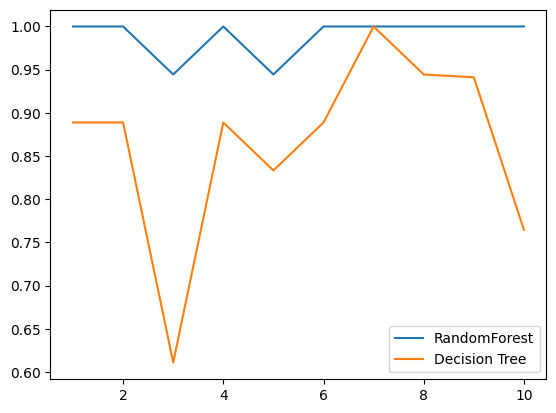

In [6]:
from sklearn.model_selection import cross_val_score # 交叉驗證
import matplotlib.pyplot as plt
 
rfc = RandomForestClassifier(n_estimators=25)# 25顆樹
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10) # 10-fold cross validation, cv=10
 
clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)
 
plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend() # 顯示圖例
plt.show()
 

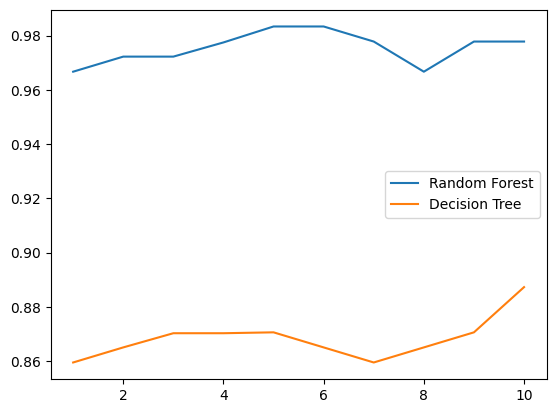

In [7]:
rfc_l = []
clf_l = []
 
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)
    
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()
 

In [ ]:
#####【TIME WARNING: 2mins 30 seconds】#####
 
superpa = []
for i in range(20):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
    
#輸出：最高精確度並取值; max(superpa))+1指的是森林樹木的數量 n_estimators   
print(max(superpa),superpa.index(max(superpa))+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,21),superpa)
plt.show()

In [ ]:
# n_estimators ->樹的數量
# random_state ->隨機挑選特徵進行分枝, 數字大較好
# 若=0時,確保分割出一樣的訓練與測試集
# 若!=0時,則會搭配隨機種子計算出一個值(使用numpy計算)
rfc = RandomForestClassifier(n_estimators=20,random_state=50)
rfc = rfc.fit(Xtrain, Ytrain)
 
# 隨機森林重要參數之一：estimators，檢視森林中樹的狀況
rfc.estimators_[0].random_state
 
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)


In [ ]:
# 不使用測試集時,可改用"袋外資料" oob(out of bag data)

rfc = RandomForestClassifier(oob_score=True)
rfc = rfc.fit(wine.data, wine.target)

rfc.oob_score_